In [58]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from data_providers import MNISTDataProvider
from data_providers import  CIFAR100DataProvider
import numpy as np
import matplotlib.pyplot as plt

In [2]:
batch_size=128
seed=1
rng = np.random.RandomState(seed=seed)  # set seed
train_data = CIFAR100DataProvider(which_set="train", batch_size=batch_size, rng=rng, random_sampling=True)
val_data = CIFAR100DataProvider(which_set="valid", batch_size=batch_size, rng=rng)
test_data = CIFAR100DataProvider(which_set="test", batch_size=batch_size, rng=rng)

In [104]:
agg = AgglomerativeClustering(n_clusters=2, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward')

n=train_data.inputs.shape[0]
X = train_data.inputs.reshape(train_data.inputs.shape[0], train_data.inputs.shape[1]*train_data.inputs.shape[2]*train_data.inputs.shape[3])
print(X[:n, :].shape, train_data.targets.shape)
agg.fit(X[:n, :], y=train_data.targets[:n])
print('Done fitting\n')


(2500, 3072) (42500,)
Done fitting



In [105]:
pred = agg.fit_predict(X[:n,:])
print('Done predicting\n')

print(pred, train_data.targets[:n])
print(sum(pred))

Done predicting

[1 0 0 ..., 0 0 0] [53 82 76 ..., 17 94 25]
295


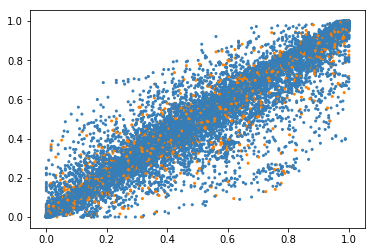

In [115]:
#http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py

from itertools import cycle, islice
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(pred) + 1))))

n=200
X1 = train_data.inputs[:n, :, : , :]
plt.scatter(X1[:n, 0], X1[:n,1], s=4, color=colors[pred])
plt.show()

In [193]:
centroid = list(np.zeros((100)))
for c in np.arange(100):
    tf = train_data.targets == c
    index = np.where(tf)[0]
    centroid[c] = np.mean( np.take(train_data.inputs, index, axis=0), axis=0)
    print(c)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [194]:
#print(centroid)


#tf = train_data.targets == 100
#index = np.where(tf)[0]
#print(index)
print(train_data.inputs.shape, index.shape)
print(np.take(train_data.inputs, index, axis=0).shape)
print(centroid[-1])

(42500, 32, 32, 3) (431,)
(431, 32, 32, 3)
[[[ 0.48481858  0.49421754  0.47554672]
  [ 0.48500973  0.49379921  0.47655672]
  [ 0.48815793  0.4971658   0.48005992]
  ..., 
  [ 0.46897769  0.47827661  0.45998782]
  [ 0.46905053  0.47814029  0.45929638]
  [ 0.47193497  0.48056066  0.46181679]]

 [[ 0.48531899  0.49398094  0.4744367 ]
  [ 0.48221639  0.48932254  0.47118855]
  [ 0.48730278  0.49454534  0.47713003]
  ..., 
  [ 0.46681219  0.47273561  0.45447394]
  [ 0.46746728  0.47488284  0.45578411]
  [ 0.46956003  0.47756702  0.45826808]]

 [[ 0.48869455  0.49633759  0.47503704]
  [ 0.48530093  0.49150628  0.47057885]
  [ 0.48961389  0.49513662  0.47478256]
  ..., 
  [ 0.47370899  0.47723937  0.45821354]
  [ 0.47223499  0.47762141  0.45771301]
  [ 0.47474632  0.48173428  0.46141633]]

 ..., 
 [[ 0.48113376  0.48473686  0.46531063]
  [ 0.47773096  0.47827664  0.45881405]
  [ 0.48026946  0.47978714  0.46112528]
  ..., 
  [ 0.47738513  0.48173422  0.46234438]
  [ 0.47208044  0.47861338  0.45

(100, 32, 32, 3)
Done fitting

Done predicting

[5 1 1 4 4 2 5 2 2 2 2 2 0 4 1 4 2 0 1 4 3 1 2 2 3 4 1 1 2 2 0 4 4 1 1 1 2
 4 1 2 2 3 1 1 1 1 1 4 4 0 1 1 4 5 1 4 4 5 4 4 0 2 1 1 1 1 1 0 0 2 1 0 4 0
 1 1 0 1 1 1 1 4 5 5 2 4 3 4 1 4 4 2 1 0 5 0 4 1 1 2] (100, 4)


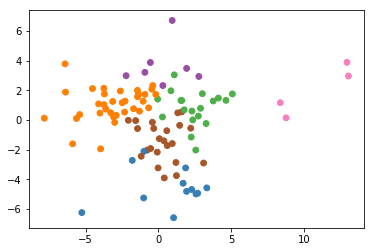

In [236]:
nr_clusters = 6
agg2 = AgglomerativeClustering(n_clusters=nr_clusters, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward')

centroid = np.array(centroid)
print(centroid.shape)
X = centroid.reshape(centroid.shape[0], centroid.shape[1]*centroid.shape[2]*centroid.shape[3])

from sklearn.decomposition import PCA
pca = PCA(n_components=4, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=seed)
X = pca.fit_transform(X)

agg2.fit(X)
print('Done fitting\n')

pred = agg2.fit_predict(X)
print('Done predicting\n')


from itertools import cycle, islice
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(pred) + 1))))

print(pred,X.shape)
plt.scatter(X[:, 0], X[:,1], s=34, color=colors[pred], marker='o')
plt.show()



In [238]:
mapped = {}

for sc in np.arange(nr_clusters):
    tf = pred == sc
    index = np.where(tf)[0]
    mapped[sc] = index
    print(index)


[12 17 30 49 60 67 68 71 73 76 93 95]
[ 1  2 14 18 21 26 27 33 34 35 38 42 43 44 45 46 50 51 54 62 63 64 65 66 70
 74 75 77 78 79 80 88 92 97 98]
[ 5  7  8  9 10 11 16 22 23 28 29 36 39 40 61 69 84 91 99]
[20 24 41 86]
[ 3  4 13 15 19 25 31 32 37 47 48 52 55 56 58 59 72 81 85 87 89 90 96]
[ 0  6 53 57 82 83 94]
